# Analysis of Elevation Profiles of Hiking Trails

## Introduction 
This project focuses on the analysis of elevation profiles of hiking trails. The data sources used are hiking trails from [OpenStreetMap (OSM)](https://www.openstreetmap.org) and elevation data from the [DMR 5G dataset](https://geoportal.cuzk.cz/(S(ayyzvgzq0sfoqh3f1wdwqovo))/Default.aspx?mode=TextMeta&metadataID=CZ-CUZK-DMR5G&head_tab=sekce-02-gp&menu=206) obtained from the [Czech Office for Surveying, Mapping and Cadastre (ČÚZK)](https://cuzk.cz). The project primarily focuses on hiking trails marked by the [Czech Tourist Club (KČT)](https://www.kct.cz).


## Import of libraries
#### Import standard libraries
[os](https://docs.python.org/3/library/os.html)  
[warnings](https://docs.python.org/3/library/warnings.html)  

#### Import libraries for data and geospatial data processing
[requests](https://docs.python-requests.org/en/latest/)  
[geopandas](https://geopandas.org/)  
[rasterio](https://rasterio.readthedocs.io/en/latest/)  
[shapely](https://shapely.readthedocs.io/en/stable/)  

#### Import libraries for visualization
[matplotlib](https://matplotlib.org/)  

#### Import libraries for working with OSM data
[osmapi](https://osmapi.tilmannr.de/)


In [1]:
# Import standard libraries
import os
import warnings

# Import libraries for data and geospatial data processing
import requests
import geopandas as gpd
import rasterio
from rasterio.plot import show
from shapely.geometry import Point, LineString

# Import libraries for visualization
import matplotlib.pyplot as plt

# Import libraries for working with OSM data
import osmapi

The hiking trail relation is downloaded using [OsmApi](https://osmapi.tilmannr.de/). A complete overview of hiking trail numbers in the Czech Republic is available [here](https://osm.paws.cz/hiking.php).

In [2]:
# Function to download a relation by its ID
def download_relation(relation_id):
    try:
        with osmapi.OsmApi() as api:
            return api.RelationGet(relation_id)
    except osmapi.errors.ElementDeletedApiError:
        print(f"Relation with ID {relation_id} has been deleted.")
        return None

Example Usage

In [3]:
# Example ID
relation_id = 334313
relation = download_relation(relation_id)
print(relation)

{'id': 334313, 'visible': True, 'version': 48, 'changeset': 159671790, 'timestamp': datetime.datetime(2024, 11, 27, 18, 14, 37), 'user': 'sannorra', 'uid': 1424365, 'tag': {'complete': 'yes', 'educational': 'yes', 'kct_yellow': 'major', 'name': 'Sigmondova okružní naučná stezka', 'network': 'lwn', 'note': 'Značena žlutým pásovým značením', 'official_name': 'Sigmondova okružní NS', 'operator': 'cz:KČT', 'osmc:symbol': 'yellow:white:yellow_bar', 'ref': '6711', 'route': 'hiking', 'type': 'route'}, 'member': [{'type': 'node', 'ref': 364493953, 'role': 'guidepost'}, {'type': 'node', 'ref': 676243685, 'role': 'guidepost'}, {'type': 'node', 'ref': 676475796, 'role': 'guidepost'}, {'type': 'node', 'ref': 655359905, 'role': 'guidepost'}, {'type': 'node', 'ref': 806808290, 'role': 'guidepost'}, {'type': 'node', 'ref': 2205940692, 'role': 'board'}, {'type': 'node', 'ref': 2205940676, 'role': 'board'}, {'type': 'node', 'ref': 676243685, 'role': 'guidepost'}, {'type': 'node', 'ref': 7099707271, 'ro

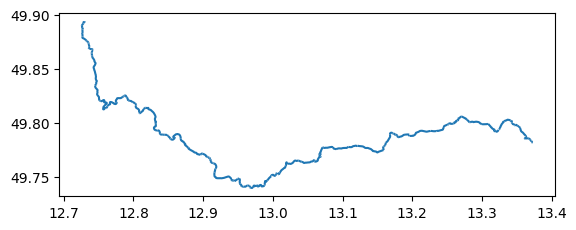

In [4]:
# Function to get coordinates for ways
def get_way_coordinates(way_id):
    try:
        way = osmapi.OsmApi().WayGet(way_id)
        nodes = []
        for node_id in way['nd']:
            node = osmapi.OsmApi().NodeGet(node_id)  # Retrieve the coordinates for each node
            if node:
                nodes.append((node['lon'], node['lat']))  # Collecting the coordinates for the way
        return nodes
    except osmapi.errors.OsmApiError:
        return None

# Example relation ID
relation_id = 222947
relation = download_relation(relation_id)

if relation:
    members = relation.get('member', [])

    # Initialize an empty list for the geometries
    geometries = []

    # Loop through members and filter out only 'way' members
    for member in members:
        if member.get('type') == 'way':
            way_id = member.get('ref')
            way_coords = get_way_coordinates(way_id)
            if way_coords:
                # Add line geometry (Way)
                geometries.append({
                    'type': 'way',
                    'ref': member.get('ref'),
                    'role': member.get('role'),
                    'geometry': LineString(way_coords)  # Store the way as a line
                })

    # Create GeoDataFrame directly from geometries (only ways)
    gdf = gpd.GeoDataFrame(geometries, crs="EPSG:4326")

    # Display the GeoDataFrame on a map
    gdf.plot()
    plt.show()


In [7]:
a = 1

In [8]:
print('helooword')

helooword
